<a href="https://colab.research.google.com/github/Risotto04/DATA-ENGINEERING-LAB/blob/main/LAB3/LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xzvf spark-3.2.1-bin-hadoop2.7.tgz
!pip install findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
!pip install pyspark==3.2.1

In [ ]:
!cat /proc/cpuinfo

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [ ]:
spark.version

'3.2.1'

In [ ]:
car_dt = spark.read.csv("./cars.csv",header=True, inferSchema=True)
car_dt.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|       130|  3504|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|       165|  3693|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|       150|  3436|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|       150|  3433|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|       140|  3449|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
car_dt.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [ ]:
print(f"The number of rows: {car_dt.count()}")
print(f"The number of columns: {len(car_dt.columns)} and list of column are {car_dt.columns}")

The number of rows: 406
The number of columns: 9 and list of column are ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']


In [ ]:
car_dt.describe().show()

+-------+--------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------+
|summary|                 Car|               MPG|        Cylinders|      Displacement|       Horsepower|            Weight|      Acceleration|             Model|Origin|
+-------+--------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------+
|  count|                 406|               406|              406|               406|              406|               406|               406|               406|   406|
|   mean|                null|23.051231527093602|5.475369458128079| 194.7795566502463|103.5295566502463|2979.4137931034484|15.519704433497521| 75.92118226600985|  null|
| stddev|                null|   8.4017773522706|1.712159631548529|104.92245837948867|40.52065912106347| 847.0043282393513|2.8033588163425462|3.74873734545

In [ ]:
url = "https://perso.telecom-paristech.fr/eagan/class/igr204/data/factbook.csv"
from pyspark import SparkFiles
spark.sparkContext.addFile(url)
country_dt = spark.read.csv("file://"+SparkFiles.get("factbook.csv"), header=True, inferSchema= True, sep =';')

In [ ]:
country_dt = country_dt.where(country_dt.Country != "String")
country_dt.show(5)

In [ ]:
country_dt.select('Country','Birth rate(births/1000 population)','Exports').summary().show(1)
# country_dt.select('Country',' Birth rate(births/1000 population)','Exports').collect()

+-------+-------+----------------------------------+-------+
|summary|Country|Birth rate(births/1000 population)|Exports|
+-------+-------+----------------------------------+-------+
|  count|    263|                               225|    224|
+-------+-------+----------------------------------+-------+
only showing top 1 row



In [ ]:
country_dt.select('Country','Exports').filter('Exports is NULL').show(10)

+--------------------+-------+
|             Country|Exports|
+--------------------+-------+
|            Akrotiri|   null|
|          Antarctica|   null|
|Ashmore and Carti...|   null|
|        Baker Island|   null|
|     Bassas da India|   null|
|       Bouvet Island|   null|
|British Indian Oc...|   null|
|    Christmas Island|   null|
|   Clipperton Island|   null|
|Cocos (Keeling) I...|   null|
+--------------------+-------+
only showing top 10 rows



In [ ]:
cereal_dt = spark.read.csv("./cereal.csv",header=True, inferSchema=True)
print(cereal_dt.show(5))
print(cereal_dt.printSchema())

+--------------------+---+----+-----------+-------+----+------+-----+-----+------+------+--------+-----+------+----+---------+-------------------+
|                name|mfr|type|   calories|protein| fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|    record_datetime|
+--------------------+---+----+-----------+-------+----+------+-----+-----+------+------+--------+-----+------+----+---------+-------------------+
|           100% Bran|  N|   C|70.44442454|   null|   1|   130| 10.0|  5.0|     6|   280|    null|    3|   1.0|0.33|68.402973|2022-06-11 14:04:45|
|   100% Natural Bran|  Q|   C|120.9993938|      3|   5|    15|  2.0|  8.0|  null|   135|       0|    3|   1.0| 1.0|33.983679|2021-09-20 14:35:58|
|            All-Bran|  K|   C|70.56453146|      4|null|  null|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|2022-04-02 03:43:03|
|All-Bran with Ext...|  K|   C|50.62726767|      4|   0|   140| 14.0|  8.0|     0|   330|      25|    3|   1.0| 0.5|93

In [ ]:
cereal_dt.filter("fat is null and sodium is null").show()

+--------+---+----+-----------+-------+----+------+-----+-----+------+------+--------+-----+------+----+---------+-------------------+
|    name|mfr|type|   calories|protein| fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|    record_datetime|
+--------+---+----+-----------+-------+----+------+-----+-----+------+------+--------+-----+------+----+---------+-------------------+
|All-Bran|  K|   C|70.56453146|      4|null|  null|  9.0|  7.0|     5|   320|      25|    3|   1.0|0.33|59.425505|2022-04-02 03:43:03|
+--------+---+----+-----------+-------+----+------+-----+-----+------+------+--------+-----+------+----+---------+-------------------+



In [ ]:
cereal_dt.select('name','sugars').filter("sugars between 7+1 and 10-1").show()

+--------------------+------+
|                name|sugars|
+--------------------+------+
|      Almond Delight|     8|
|Cinnamon Toast Cr...|     9|
|      Golden Grahams|     9|
|Just Right Fruit ...|     9|
|    Nut&Honey Crunch|     9|
|     Raisin Nut Bran|     8|
| Wheaties Honey Gold|     8|
+--------------------+------+



In [ ]:
cereal_dt.select('name','sugars').where("sugars between 7+1 and 10-1").show()

+--------------------+------+
|                name|sugars|
+--------------------+------+
|      Almond Delight|     8|
|Cinnamon Toast Cr...|     9|
|      Golden Grahams|     9|
|Just Right Fruit ...|     9|
|    Nut&Honey Crunch|     9|
|     Raisin Nut Bran|     8|
| Wheaties Honey Gold|     8|
+--------------------+------+



In [ ]:
count= cereal_dt.filter("mfr in ('P','Q')").count()
print(f'The number of rows containing P or Q in mfr is {count}')

The number of rows containing P or Q in mfr is 15


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
cereal_pd = cereal_dt.toPandas()
cereal_pd.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,record_datetime
0,100% Bran,N,C,70.444425,NaN,1.0,130.0,10.0,5.0,6.0,280.0,NaN,3.0,1.0,0.33,68.402973,2022-06-11 14:04:45
1,100% Natural Bran,Q,C,120.999394,3.0,5.0,15.0,2.0,8.0,NaN,135.0,0.0,3.0,1.0,1.00,33.983679,2021-09-20 14:35:58
2,All-Bran,K,C,70.564531,4.0,NaN,NaN,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505,2022-04-02 03:43:03
3,All-Bran with Extra Fiber,K,C,50.627268,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912,2021-11-20 03:42:19
4,Almond Delight,R,C,110.289245,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,1.0,0.75,34.384843,2019-12-26 03:44:02


In [ ]:
select_cereal = ['Clusters', 'Froot Loops', 'Grape-Nuts']

select_name = list(cereal_pd.loc[cereal_pd['name'].isin(select_cereal)].iloc[:, 0])
select_row_protein = list(cereal_pd.loc[cereal_pd['name'].isin(select_cereal)].iloc[:, 4])
select_row_fat = list(cereal_pd.loc[cereal_pd['name'].isin(select_cereal)].iloc[:, 5])

Text(0, 0.5, 'nutrients (mg)')

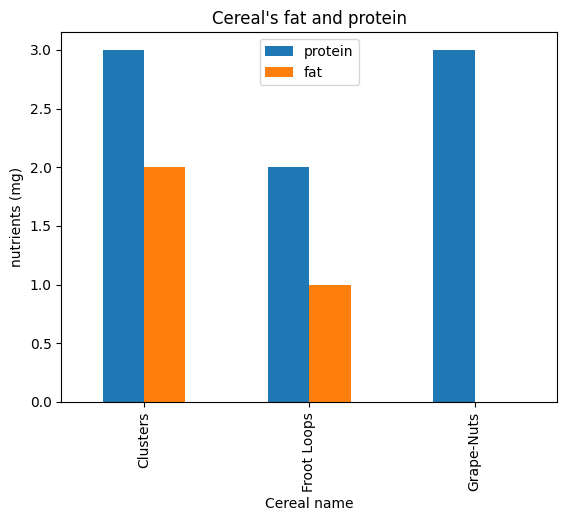

In [ ]:
plotdata = pd.DataFrame({
    "protein":select_row_protein,
    "fat":select_row_fat,
    },
    index=select_name
)
plotdata.plot(kind="bar")
plt.title("Cereal's fat and protein")
plt.xlabel("Cereal name")
plt.ylabel("nutrients (mg)")

Text(0, 0.5, 'calories')

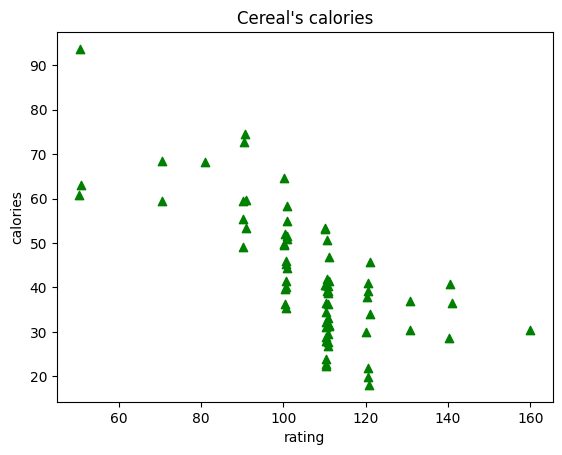

In [ ]:
rating = list(cereal_pd.iloc[:,15])
calories = list(cereal_pd.iloc[:,3])
plt.scatter(calories,rating,marker='^',c='g')
plt.title("Cereal's calories")
plt.xlabel("rating")
plt.ylabel("calories")

In [ ]:
from pyspark.sql import functions as f

In [ ]:
print(cereal_dt.printSchema())
cereal_dt = cereal_dt.withColumn('record_datetime',f.to_timestamp(cereal_dt.record_datetime))
print(cereal_dt.printSchema())

root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- calories: double (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = true)
 |-- sugars: integer (nullable = true)
 |-- potass: integer (nullable = true)
 |-- vitamins: integer (nullable = true)
 |-- shelf: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cups: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- record_datetime: string (nullable = true)

None
root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- calories: double (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = tr

In [ ]:
from typing import cast
cereal_dt = cereal_dt.withColumn('calories',cereal_dt.calories.cast("int"))
print(cereal_dt.printSchema())

root
 |-- name: string (nullable = true)
 |-- mfr: string (nullable = true)
 |-- type: string (nullable = true)
 |-- calories: integer (nullable = true)
 |-- protein: integer (nullable = true)
 |-- fat: integer (nullable = true)
 |-- sodium: integer (nullable = true)
 |-- fiber: double (nullable = true)
 |-- carbo: double (nullable = true)
 |-- sugars: integer (nullable = true)
 |-- potass: integer (nullable = true)
 |-- vitamins: integer (nullable = true)
 |-- shelf: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cups: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- record_datetime: timestamp (nullable = true)

None


In [ ]:
cereal_clean_dt = cereal_dt.withColumn('name',f.when(cereal_dt.name == 'Just Right Fruit & Nut',1).otherwise('Just Right Fruit and Nut'))
cereal_clean_dt.where('name = "Just Right Fruit and Nut"').select('name').show(1,False)

+------------------------+
|name                    |
+------------------------+
|Just Right Fruit and Nut|
+------------------------+
only showing top 1 row



In [ ]:
cereal_dt.select('name').filter(~cereal_dt.name.rlike('^[A-Za-z\s-]+$')).show(truncate=False)

+-------------------------+
|name                     |
+-------------------------+
|All-Bran                 |
|All-Bran with Extra Fiber|
|Almond Delight           |
|Apple Cinnamon Cheerios  |
|Apple Jacks              |
|Bran Chex                |
|Bran Flakes              |
|Cheerios                 |
|Cinnamon Toast Crunch    |
|Clusters                 |
|Cocoa Puffs              |
|Corn Chex                |
|Corn Flakes              |
|Corn Pops                |
|Count Chocula            |
|Crispix                  |
|Double Chex              |
|Froot Loops              |
|Frosted Flakes           |
|Frosted Mini-Wheats      |
+-------------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, sum, when, count
cereal_null_dt = cereal_clean_dt.select([count(when(col(c).isNull(), c)).alias(c) for c in cereal_clean_dt.columns])
cereal_null_dt.show(truncate=False)

+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|rating|record_datetime|
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|0   |2  |3   |1       |2      |2  |4     |2    |2    |3     |1     |1       |2    |2     |0   |1     |0              |
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+



In [ ]:
cereal_clean_dt =cereal_clean_dt.na.drop(subset=["vitamins"])
cereal_clean_dt.select([count(when(col(c).isNull(), c)).alias(c) for c in cereal_clean_dt.columns]).show(truncate=False)

+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|rating|record_datetime|
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|0   |2  |3   |1       |1      |2  |4     |2    |2    |3     |1     |0       |2    |2     |0   |1     |0              |
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+



In [ ]:
cereal_final_dt =cereal_clean_dt.na.drop('any')
cereal_final_dt.select([count(when(col(c).isNull(), c)).alias(c) for c in cereal_final_dt.columns]).show(truncate=False)

+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|rating|record_datetime|
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+
|0   |0  |0   |0       |0      |0  |0     |0    |0    |0     |0     |0       |0    |0     |0   |0     |0              |
+----+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+------+---------------+



In [ ]:
import shutil
import os
folder='/content/cereal_final_save'
cereal_final_dt.coalesce(1).write.csv(folder,header=True)
for i in os.listdir(folder):
  if i[0:10]=='part-00000':
    shutil.move(os.path.join(folder, i), '/content/cereal_final.csv')